# 代码详解

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

In [7]:
#da=np.loadtxt("data1.txt")
#2345行是数字 都转化为float型分别是离散率 电站瞬时发电水平 太阳高度角
data = np.loadtxt("data1.txt", delimiter="\t", dtype=float,usecols=(1,2,3,4))
data[:5]

array([[ 0.706     ,  0.        ,  6.67289579,  1.        ],
       [ 0.457     ,  0.70208333, 16.046116  ,  1.        ],
       [ 0.375     ,  0.81796117, 23.74479969,  1.        ],
       [ 0.355     ,  0.94093643, 29.10128228,  1.        ],
       [ 0.357     ,  1.        , 31.45182751,  1.        ]])

In [8]:
data.shape

(80, 4)

In [3]:
#第一行是地点 
data_index = np.loadtxt("data1.txt", dtype=str, delimiter=",", usecols=0)
data_index.shape

(80,)

In [4]:
# DataFrame是一种表格型数据结构,columns是列名，index是行名
dataframe = pd.DataFrame(data=data,columns=('dispersion ratio', 'generate level', 'solar elevation', 'label'),index=data_index)
dataframe

,dispersion ratio,generate level,solar elevation,label
14姜集8\t0.706\t0\t6.672895788\t1,0.706,0.000000,6.672896,1.0
14姜集9\t0.457\t0.702083333\t16.046116\t1,0.457,0.702083,16.046116,1.0
14姜集10\t0.375\t0.817961165\t23.74479969\t1,0.375,0.817961,23.744800,1.0
14姜集11\t0.355\t0.940936426\t29.10128228\t1,0.355,0.940936,29.101282,1.0
14姜集12\t0.357\t1\t31.45182751\t1,0.357,1.000000,31.451828,1.0
...,...,...,...,...
45太平傅家11\t0.015\t0.913735899\t29.10128228\t0,0.015,0.913736,29.101282,0.0
45太平傅家12\t0.014\t0.91507177\t31.45182751\t0,0.014,0.915072,31.451828,0.0
45太平傅家13\t0.025\t0.91507177\t30.43290781\t0,0.025,0.915072,30.432908,0.0
45太平傅家14\t0.1\t0.889634351\t26.20837733\t0,0.100,0.889634,26.208377,0.0


In [5]:
dataframe.describe( )
##统计缺失值总数: dataframe.isnull().sum()

,dispersion ratio,generate level,solar elevation,label
count,80.000000,80.000000,80.000000,80.000000
mean,0.179563,0.835019,22.877467,0.575000
std,0.162726,0.190514,7.977855,0.497462
min,0.009000,0.000000,6.672896,0.000000
25%,0.041000,0.794483,18.532675,0.000000
50%,0.123500,0.902214,24.976589,1.000000
75%,0.283000,0.952553,29.434189,1.000000
max,0.722000,1.000000,31.451828,1.000000


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 14姜集8	0.706	0	6.672895788	1 to 45太平傅家15	0.429	0.918091809	19.36152754	1
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dispersion ratio  80 non-null     float64
 1   generate level    80 non-null     float64
 2   solar elevation   80 non-null     float64
 3   label             80 non-null     float64
dtypes: float64(4)
memory usage: 3.1+ KB


In [7]:
#x是数据，y是标签
x, y = np.split(dataframe, (3,), axis=1)
x.shape,y.shape

((80, 3), (80, 1))

In [8]:
# 2、拆分训练数据与测试数据，为了进行交叉验证
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=4)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=25)

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

a, b, c = np.split(x_test, 3, axis=1)

In [9]:
x_train.shape,a.shape

((56, 3), (24, 1))

In [10]:
# 参数分别代表n_estimators：决策树的个数，n_jobs：并行的个数，oob_score：带外数据验证 verbose： 是否显示任务进程
rfclf = RandomForestClassifier(n_estimators=100, n_jobs=2, oob_score=True, verbose=1)
#print(clf)
rfclf.fit(x_train,y_train)
joblib.dump(rfclf, "randomf_model.m")  # 保存模型
print("训练完成")

E:\AS\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


训练完成


In [11]:
# 用训练集验证
answer = rfclf.predict(x_train)
#y_train = y_train.reshape(-1)
y_train1 = y_train['label']
print(np.mean(answer == y_train1))

1.0


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [13]:
# 用测试集验证
answer1 = rfclf.predict(x_test)
y_test1 = y_test['label']
print(np.mean(answer1 == y_test1))
# score=dtclf.score(x_test,y_test)
# score

0.9166666666666666


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


[Text(418.5, 733.86, 'X[0] <= 0.102\ngini = 0.484\nsamples = 56\nvalue = [23, 33]'),
 Text(167.4, 570.78, 'X[1] <= 0.988\ngini = 0.1\nsamples = 19\nvalue = [18, 1]'),
 Text(83.7, 407.70000000000005, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(251.10000000000002, 407.70000000000005, 'X[2] <= 29.767\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(167.4, 244.62, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(334.8, 244.62, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(669.6, 570.78, 'X[0] <= 0.146\ngini = 0.234\nsamples = 37\nvalue = [5, 32]'),
 Text(585.9, 407.70000000000005, 'X[1] <= 0.768\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(502.20000000000005, 244.62, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(669.6, 244.62, 'X[2] <= 24.231\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(585.9, 81.54000000000008, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(753.3000000000001, 81.54000000000008, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(753.300

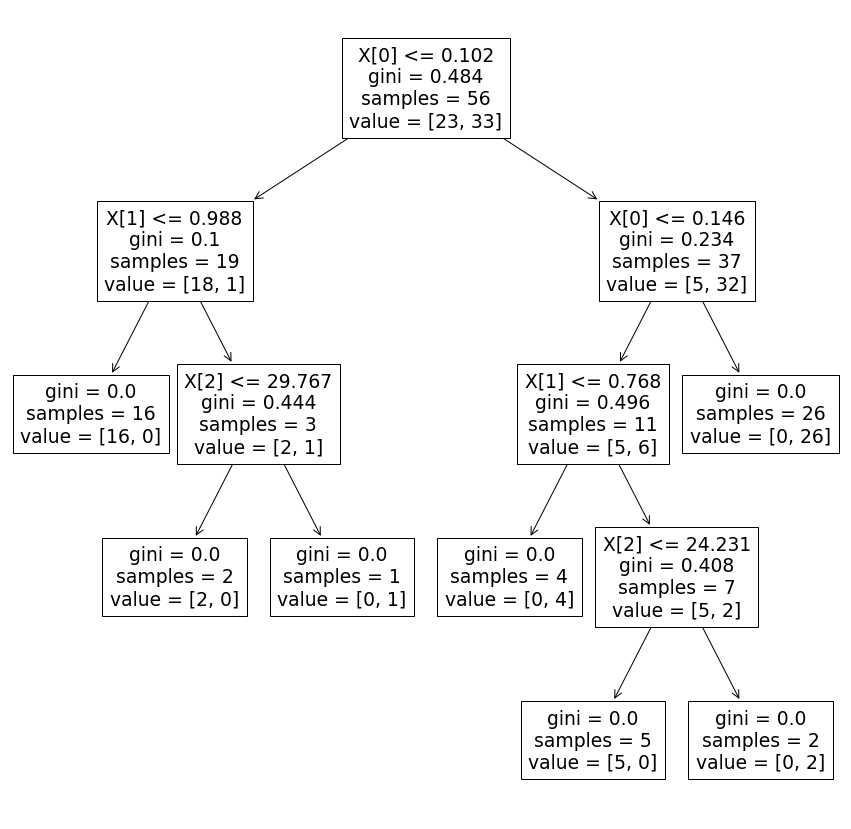

In [12]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
dtclf=DecisionTreeClassifier()
dtclf.fit(x_train,y_train)
#保存模型
joblib.dump(dtclf, "tree_model.m")
plt.figure(figsize=[15,15])
tree.plot_tree(dtclf)

In [14]:
# 用训练集验证
answer = dtclf.predict(x_train)
#y_train = y_train.reshape(-1)
y_train1 = y_train['label']
print(np.mean(answer == y_train1))

1.0


In [15]:
# 用测试集验证
answer1 = dtclf.predict(x_test)
y_test1 = y_test['label']
print(np.mean(answer1 == y_test1))
# score=dtclf.score(x_test,y_test)
# score

0.9583333333333334


In [19]:
# 1、读入数据，并将原始数据中的数据转换为数字形式
test_data = np.loadtxt("alldata.txt", delimiter="\t",dtype=float,usecols=(1,2,3))
test_data_index = np.loadtxt("alldata.txt",dtype=str,usecols=0)
test_dataframe = pd.DataFrame(data=test_data,columns=('dispersion ratio', 'generate level', 'solar elevation'),index=test_data_index)


In [17]:
# 2.读入训练好的随机森林
clf = joblib.load("tree_model.m")
result = dtclf.predict(test_dataframe)
# 3.进行预测
test_dataframe['predict'] = result
#4.结果写入文件
test_dataframe.to_csv("tree_result(all data).csv")

In [20]:
# 2.读入训练好的随机森林
clf = joblib.load("randomf_model.m")
result = dtclf.predict(test_dataframe)
# 3.进行预测
test_dataframe['predict'] = result
#4.结果写入文件
test_dataframe.to_csv("random_result(all data).csv")

In [21]:
csv1=pd.read_csv("tree_result(all data).csv")
csv1[88:99]

,Unnamed: 0,dispersion ratio,generate level,solar elevation,predict
88,12牛王8,0.475,0.000000,6.672896,1.0
89,12牛王9,0.150,0.666667,16.046120,1.0
90,12牛王10,0.078,0.776699,23.744800,0.0
91,12牛王11,0.035,0.893471,29.101280,0.0
92,12牛王12,0.043,0.949555,31.451830,0.0
93,12牛王13,0.036,0.949555,30.432910,0.0
94,12牛王14,0.106,0.960265,26.208380,1.0
95,12牛王15,0.295,0.940171,19.361530,1.0
96,13王元气8,0.061,1.000000,6.672896,0.0
97,13王元气9,0.027,0.933333,16.046120,0.0


In [22]:
csv2=pd.read_csv("random_result(all data).csv")
csv2[88:99]

,Unnamed: 0,dispersion ratio,generate level,solar elevation,predict
88,12牛王8,0.475,0.000000,6.672896,1.0
89,12牛王9,0.150,0.666667,16.046120,1.0
90,12牛王10,0.078,0.776699,23.744800,0.0
91,12牛王11,0.035,0.893471,29.101280,0.0
92,12牛王12,0.043,0.949555,31.451830,0.0
93,12牛王13,0.036,0.949555,30.432910,0.0
94,12牛王14,0.106,0.960265,26.208380,1.0
95,12牛王15,0.295,0.940171,19.361530,1.0
96,13王元气8,0.061,1.000000,6.672896,0.0
97,13王元气9,0.027,0.933333,16.046120,0.0


In [23]:
m=0
n=0
for i in csv1["predict"]:
    if i == 0:
        m+=1
    elif i == 1:
        n+=1
n,m,m+n

(1772, 1828, 3600)

In [24]:
p=0
q=0
for i in csv2["predict"]:
    if i == 0:
        q+=1
    elif i == 1:
        p+=1
p,q

(1772, 1828)

In [25]:
np.sum(csv2["predict"]),np.sum(csv1["predict"])

(1772.0, 1772.0)

In [26]:
#用向量机做做，结果不行，可能数据归一化弄下会好点
from sklearn import svm
svmclf=svm.SVC(C=0.5,degree=8)
svmclf.fit(x_train,y_train)
# 用测试集验证
svmclf.score(x_test,y_test)

E:\AS\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5416666666666666

In [27]:
from sklearn import svm
svmclf=svm.SVC(C=0.5,degree=5)
svmclf.fit(x_train,y_train)
# 用测试集验证
svmclf.score(x_test,y_test)

E:\AS\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5416666666666666

# 代码复现

In [9]:
# 这边joblib报错的话可以不用保存模型，用训练出来的直接预测
# 对原始数据进行分为训练数据和测试数据
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

featureName = 'dispersion ratio', 'generate level', 'solar elevation'
className = 'yes', 'no'

# 1、读入数据，并将原始数据中的数据转换为数字形式
data = np.loadtxt("data1.txt", delimiter="\t", dtype=float,usecols=(1,2,3,4))
data_index = np.loadtxt("data1.txt", dtype=str, delimiter=",", usecols=0)
dataframe = pd.DataFrame(data=data,columns=('dispersion ratio', 'generate level', 'solar elevation', 'label'),index=data_index)
x, y = np.split(dataframe, (3,), axis=1)

# 2、拆分训练数据与测试数据，为了进行交叉验证
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=2)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
a, b, c = np.split(x_test, 3, axis=1)

# 参数分别代表n_estimators：决策树的个数，n_jobs：并行的个数，oob_score：带外数据验证 verbose： 是否显示任务进程
clf = RandomForestClassifier(n_estimators=100, n_jobs=2, oob_score=True, verbose=1)
print(clf)
clf.fit(x_train,y_train)
joblib.dump(clf, "train_model2.m")  # 保存模型
print("训练完成")

# 用训练集验证
answer = clf.predict(x_train)
#y_train = y_train.reshape(-1)
y_train1 = y_train['label']
print(np.mean(answer == y_train1))

# 用测试集验证
answer1 = clf.predict(x_test)
y_test1 = y_test['label']
print(np.mean(answer1 == y_test1))

#预测未知数据并保存到result(all data).csv文件中
print("**"*20,"对未知数据预测","**"*20)
# 1、读入数据，并将原始数据中的数据转换为数字形式
test_data = np.loadtxt("alldata.txt", delimiter="\t",dtype=float,usecols=(1,2,3))
test_data_index = np.loadtxt("alldata.txt",dtype=str,usecols=0)
test_dataframe = pd.DataFrame(data=test_data,columns=('dispersion ratio', 'generate level', 'solar elevation'),index=test_data_index)
# 2.读入训练好的随机森林
clf = joblib.load("train_model2.m")
result = clf.predict(test_dataframe)
# 3.进行预测
test_dataframe['predict'] = result
#4.结果写入文件
test_dataframe.to_csv("result(all data).csv")


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=True, random_state=None, verbose=1,
                       warm_start=False)


E:\AS\anaconda\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


训练完成
1.0


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9166666666666666
对未知数据预测 ****************************************


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [5]:
#这是原始模型

# 对原始数据进行分为训练数据和测试数据
from sklearn.model_selection import train_test_split
# from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

featureName = 'dispersion ratio', 'generate level', 'solar elevation'
className = 'yes', 'no'

# 1、读入数据，并将原始数据中的数据转换为数字形式
data = np.loadtxt("data1.txt", delimiter="\t", dtype=float,usecols=(1,2,3,4))
data_index = np.loadtxt("data1.txt", dtype=str, delimiter=",", usecols=0)
dataframe = pd.DataFrame(data=data,columns=('dispersion ratio', 'generate level', 'solar elevation', 'label'),index=data_index)
x, y = np.split(dataframe, (3,), axis=1)

# 2、拆分训练数据与测试数据，为了进行交叉验证
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=2)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
a, b, c = np.split(x_test, 3, axis=1)

# 参数分别代表n_estimators：决策树的个数，n_jobs：并行的个数，oob_score：带外数据验证 verbose： 是否显示任务进程
clf = RandomForestClassifier(n_estimators=100, n_jobs=2, oob_score=True, verbose=1)
print(clf)
clf.fit(x_train,y_train)
# joblib.dump(clf, "train_model2.m")  # 保存模型
print("训练完成")

# 用训练集验证
answer = clf.predict(x_train)
#y_train = y_train.reshape(-1)
y_train1 = y_train['label']
print(np.mean(answer == y_train1))

# 用测试集验证
answer1 = clf.predict(x_test)
y_test1 = y_test['label']
print(np.mean(answer1 == y_test1))




RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=True, random_state=None, verbose=1,
                       warm_start=False)


E:\AS\anaconda\lib\site-packages\ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


训练完成
1.0


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9166666666666666


In [ ]:

#coding:utf-8
#!/usr/bin/python
# 对原始数据进行分为训练数据和测试数据
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# 1、读入数据，并将原始数据中的数据转换为数字形式
test_data = np.loadtxt("alldata.txt", delimiter="\t",dtype=float,usecols=(1,2,3))
test_data_index = np.loadtxt("alldata.txt",dtype=str,usecols=0)
test_dataframe = pd.DataFrame(data=test_data,columns=('dispersion ratio', 'generate level', 'solar elevation'),index=test_data_index)
# 2.读入训练好的随机森林
clf = joblib.load("train_model2.m")
result = clf.predict(test_dataframe)
# 3.进行预测
test_dataframe['predict'] = result
#4.结果写入文件
test_dataframe.to_csv("result(all data).csv")